In [1]:
from pathlib import Path
import cv2 as cv
from matplotlib import pyplot as plt
import openslide
import numpy as np
import os

thispath = Path.cwd().resolve()

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030438500320103.svs
((149400, 65765), (37350, 16441), (9337, 4110), (2334, 1027))
0.25180000000000002
[40.0, 9.999923971139445, 2.499838029926679, 0.6247739585378796]


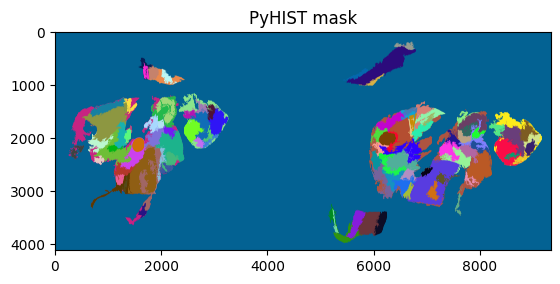

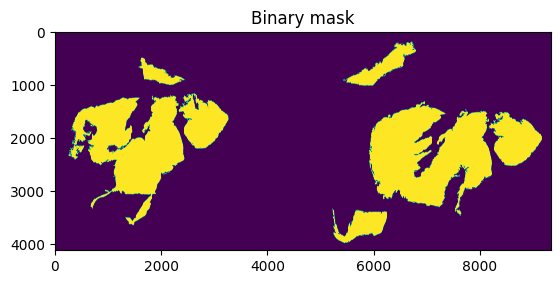

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030303300314209.svs
((57853, 42223), (14463, 10555), (3615, 2638))
0.50049999999999994
[20.0, 4.999779155108691, 1.2496375171338154]


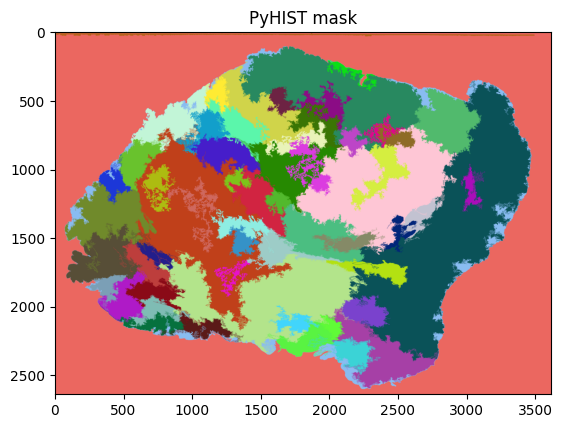

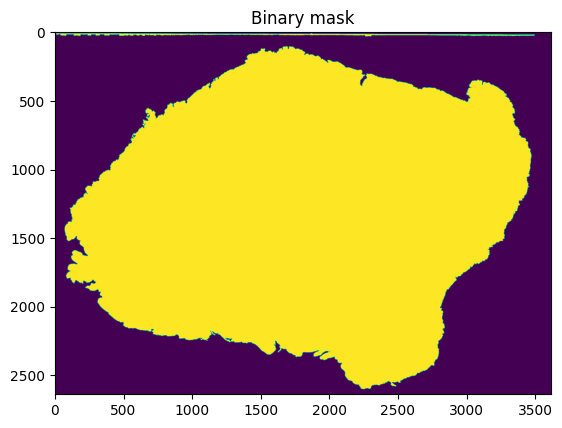

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030732500335034.svs
((75696, 29620), (18924, 7405), (4731, 1851), (2365, 925))
0.50229999999999997
[20.0, 5.0, 1.249915591869809, 0.6247229066017659]


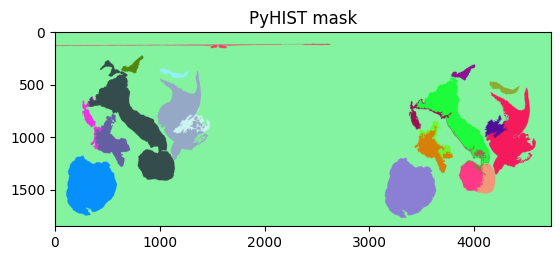

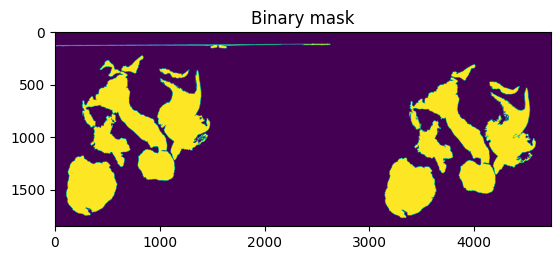

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030490000322447.svs
((103737, 46176), (25934, 11544), (6483, 2886), (3241, 1443))
0.50049999999999994
[20.0, 4.999975900478617, 1.2499457739859736, 0.6249246802828647]


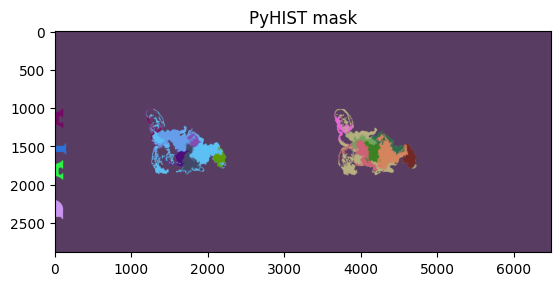

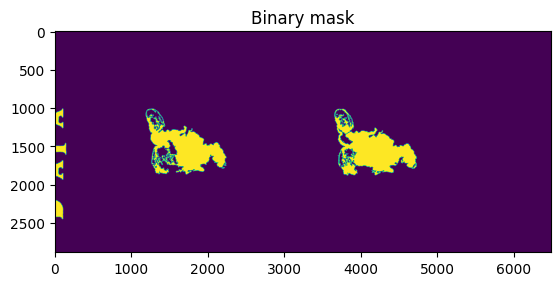

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030508000324808.svs
((45884, 33846), (11471, 8461), (2867, 2115))
0.50049999999999994
[20.0, 4.999852267690944, 1.2497257461520914]


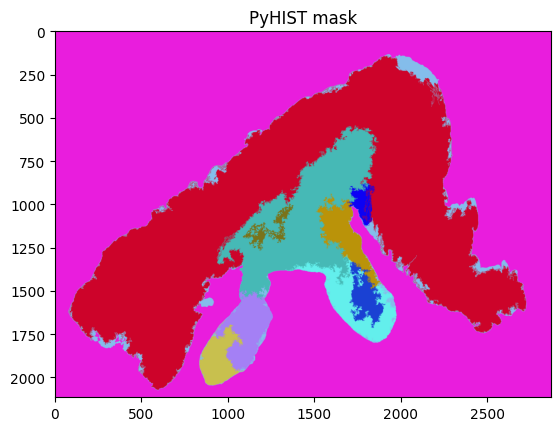

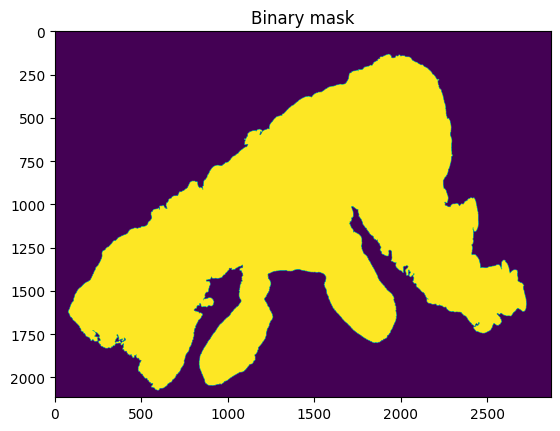

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030640600331515.svs
((53863, 44556), (13465, 11139), (3366, 2784))
0.50049999999999994
[20.0, 4.999860753970832, 1.249750441842967]


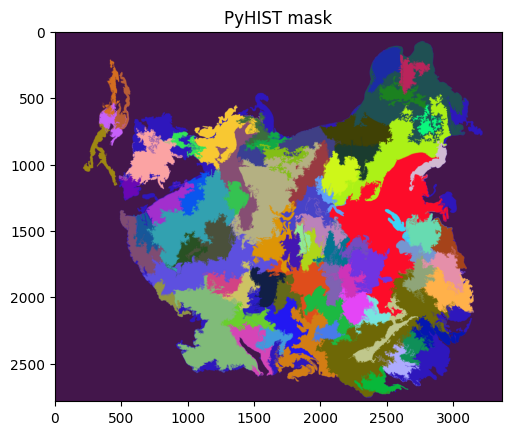

KeyboardInterrupt: 

In [90]:

datadir = Path("/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC")

def available_magnifications(mpp, level_downsamples):
	mpp = float(mpp)
	if (mpp<0.26):
		magnification = 40
	else:
		magnification = 20
	
	mags = []
	for l in level_downsamples:
		mags.append(magnification/l)
	
	return mags


def check_corners(img):
    """

    Parameters
    ----------
    img (numpy): Image data
    Returns
    -------
    answer (bool): BGR values for the background
    """
    cropped_image = img.copy()
    width, height, _ = cropped_image.shape
    cropped_image = cropped_image[0+100:width-100, 0+100:height-100]
    width, height, _ = cropped_image.shape
    top_left = img[0, 0, :]
    top_right = img[width-1, 0, :]
    bottom_left = img[0, height-1, :]
    bottom_right = img[width-1, height-1, :]
    most_frequent = np.argmax(np.bincount([np.sum(top_left), np.sum(top_right), 
					   					   np.sum(bottom_left), np.sum(bottom_right)]))
    
    if most_frequent == np.sum(top_left):
	    return top_left
    elif most_frequent == np.sum(top_right):
	    return top_right
    elif most_frequent == np.sum(bottom_left):
	    return bottom_left
    elif most_frequent == np.sum(bottom_right):
	    return bottom_right


for i in range(3):
	maskdir = Path(thispath.parent / "data" / "Mask_PyHIST" / f"LungAOEC_List{i+1}")

	images = os.listdir(maskdir)

	for image in images:

		svs_file = [i for i in datadir.rglob("*.svs") if "LungAOEC" in str(i) and image in str(i)]

		histo_mask = cv.imread(str(Path(maskdir / image / f"segmented_{image}.ppm")))
		print(svs_file[0])
		slide = openslide.OpenSlide(str(svs_file[0]))
		print(slide.level_dimensions)
		mpp = slide.properties['openslide.mpp-x']
		print(mpp)

		level_downsamples = slide.level_downsamples
		mags = available_magnifications(mpp, level_downsamples)
		print(mags)

		# Mask from PyHIST to binary mask
		copy = histo_mask.copy()

		most_frequnt = check_corners(copy)

		copy[copy == most_frequnt] = 0
		copy[copy != most_frequnt] = 1

		binary_mask = copy[:,:,0]

		plt.imshow(histo_mask)
		plt.title("PyHIST mask")
		plt.show()


		plt.imshow(binary_mask)
		plt.title("Binary mask")
		plt.show()